In [1]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162729 sha256=ba3dcc5a6bef6cc900b7291599d753709c7f73368052d8c7bcda4813015e6e88
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
from surprise.prediction_algorithms import SVD, SVDpp, NMF
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = Dataset.load_builtin('ml-100k')
measures=['rmse', 'mae', 'fcp']

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


**Модель SVD** (Singular Value Decomposition) використовується для рекомендаційних систем на основі факторизації рейтингів.
Далі виконується побудова моделі з параметрами:
**{'n_epochs': [5, 10, 20], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.02, 0.1, 0.4]}**
Для кожного з наборів параметрів виконується крос-валідація із оцінкою  набору характеристик зі змінної **measures=['rmse', 'mae', 'fcp']**

In [5]:
# Побудова моделі SVD і виконання крос-валідації для підбору параметрів
print("Cross-validating SVD...")
svd_param_grid = {'n_epochs': [5, 10, 20], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.02, 0.1, 0.4]}
svd_grid_search = GridSearchCV(SVD, svd_param_grid, measures=measures, cv=5)
svd_grid_search.fit(data)

# Виведення метрик
for metric in measures:
    print("Best", metric.upper(), "score for SVD:", svd_grid_search.best_score[metric])
    print("Best parameters for", metric.upper(), ":", svd_grid_search.best_params[metric])


Cross-validating SVD...
Best RMSE score for SVD: 0.9208271179980662
Best parameters for RMSE : {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}
Best MAE score for SVD: 0.7286718988467344
Best parameters for MAE : {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}
Best FCP score for SVD: 0.7147546781586374
Best parameters for FCP : {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}


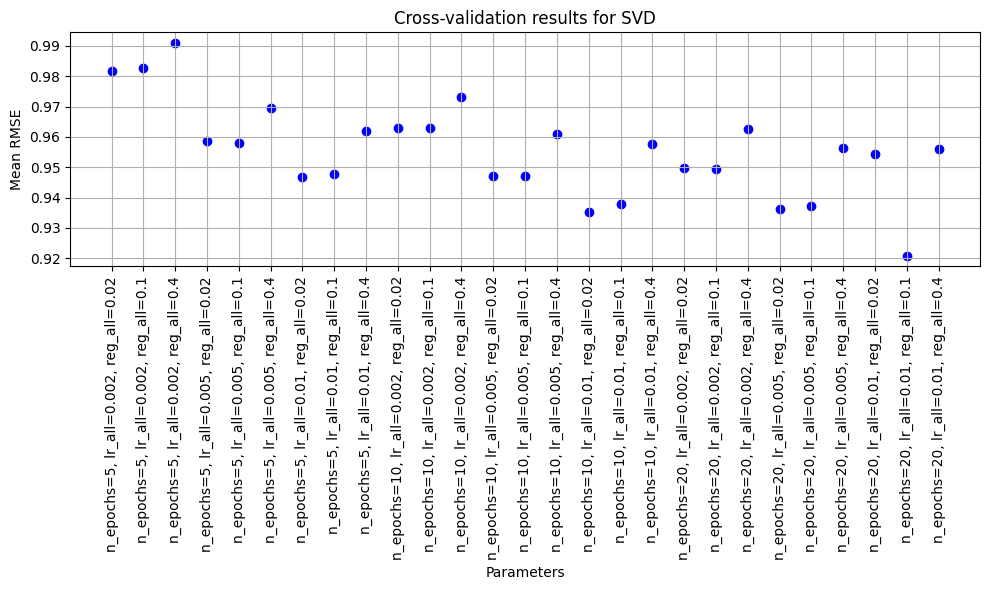

In [15]:
# побудова точкової діаграми розподілу RMSE в залежності від комбінації параметрів svd_param_grid.

results_svd = svd_grid_search.cv_results

plt.figure(figsize=(10, 6))

# різні комбінації параметрів
n_epochs = svd_param_grid['n_epochs']
lr_all = svd_param_grid['lr_all']
reg_all = svd_param_grid['reg_all']

for i, n_epoch in enumerate(n_epochs):
    for j, lr in enumerate(lr_all):
        for k, reg in enumerate(reg_all):
            params_str = f"n_epochs={n_epoch}, lr_all={lr}, reg_all={reg}"
            mean_rmse = results_svd['mean_test_rmse'][i * len(lr_all) * len(reg_all) + j * len(reg_all) + k]
            plt.scatter(params_str, mean_rmse, color='blue')

plt.xlabel('Parameters')
plt.ylabel('Mean RMSE')
plt.title('Cross-validation results for SVD')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

Найкращі параметри для моделі SVD - **'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1**

In [7]:
# Побудова моделі SVD++ і виконання крос-валідації
print("Cross-validating SVD++...")
svdpp_param_grid = {'n_epochs': [10, 20], 'lr_all': [0.005, 0.01], 'reg_all': [0.1]}
svdpp_grid_search = GridSearchCV(SVDpp, svdpp_param_grid, measures=measures, cv=5)
svdpp_grid_search.fit(data)

for metric in measures:
    print("Best", metric.upper(), "score for SVD++:", svdpp_grid_search.best_score[metric])
    print("Best parameters for", metric.upper(), ":", svdpp_grid_search.best_params[metric])

Cross-validating SVD++...
Best RMSE score for SVD++: 0.9192466506857808
Best parameters for RMSE : {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}
Best MAE score for SVD++: 0.7270145163551675
Best parameters for MAE : {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}
Best FCP score for SVD++: 0.7133962975875072
Best parameters for FCP : {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}


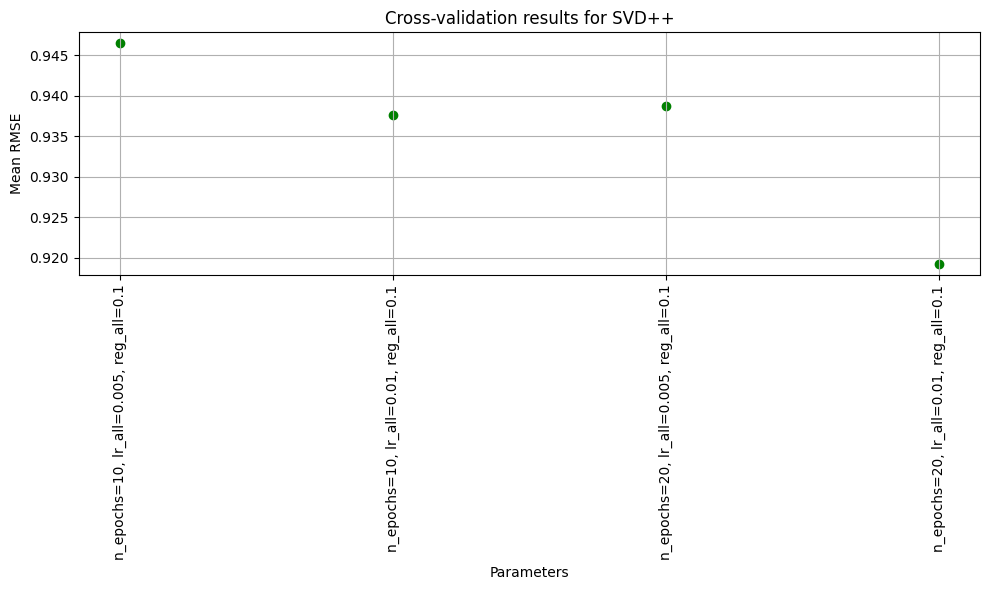

In [19]:
# Модель SVD++, побудова точкової діаграми розподілу RMSE в залежності від комбінації параметрів
results_svd = svd_grid_search.cv_results

plt.figure(figsize=(10, 6))

# різні комбінації параметрів
n_epochs = svdpp_param_grid['n_epochs']
lr_all = svdpp_param_grid['lr_all']
reg_all = svdpp_param_grid['reg_all']

for i, n_epoch in enumerate(n_epochs):
    for j, lr in enumerate(lr_all):
        for k, reg in enumerate(reg_all):
            params_str = f"n_epochs={n_epoch}, lr_all={lr}, reg_all={reg}"
            mean_rmse = results_svdpp['mean_test_rmse'][i * len(lr_all) * len(reg_all) + j * len(reg_all) + k]
            plt.scatter(params_str, mean_rmse, color='green')

plt.xlabel('Parameters')
plt.ylabel('Mean RMSE')
plt.title('Cross-validation results for SVD++')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
# Побудова моделі NMF і виконання крос-валідації
print("Cross-validating NMF...")
nmf_param_grid = {'n_epochs': [5, 10, 20], 'lr_bu': [0.002, 0.005, 0.01], 'reg_bu': [0.02, 0.1, 0.4]}
measures = ['rmse', 'mae', 'fcp']  # Розширений список метрик
nmf_grid_search = GridSearchCV(NMF, nmf_param_grid, measures=measures, cv=5)
nmf_grid_search.fit(data)

# Виведення кожної метрики
for metric in measures:
    print("Best", metric.upper(), "score for NMF:", nmf_grid_search.best_score[metric])
    print("Best parameters for", metric.upper(), ":", nmf_grid_search.best_params[metric])

Cross-validating NMF...
Best RMSE score for NMF: 0.9763754517521921
Best parameters for RMSE : {'n_epochs': 20, 'lr_bu': 0.002, 'reg_bu': 0.1}
Best MAE score for NMF: 0.7605258814505161
Best parameters for MAE : {'n_epochs': 20, 'lr_bu': 0.002, 'reg_bu': 0.1}
Best FCP score for NMF: 0.6804363151924206
Best parameters for FCP : {'n_epochs': 20, 'lr_bu': 0.005, 'reg_bu': 0.4}


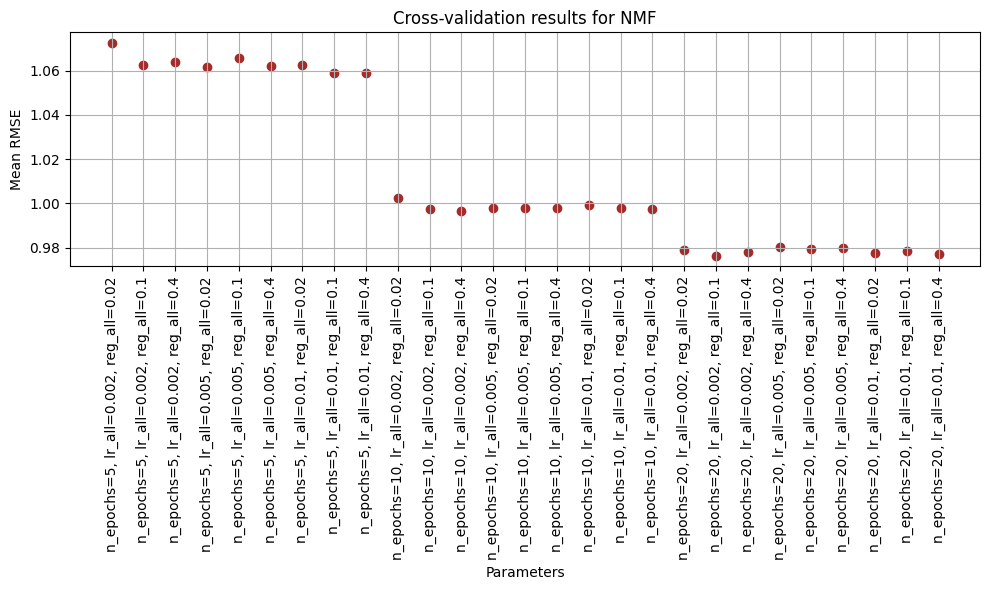

In [22]:
# Модель NMF, побудова точкової діаграми розподілу RMSE в залежності від комбінації параметрів
results_nmf = nmf_grid_search.cv_results

plt.figure(figsize=(10, 6))

# різні комбінації параметрів
n_epochs = nmf_param_grid['n_epochs']
lr_all = nmf_param_grid['lr_bu']
reg_all = nmf_param_grid['reg_bu']

for i, n_epoch in enumerate(n_epochs):
    for j, lr in enumerate(lr_all):
        for k, reg in enumerate(reg_all):
            params_str = f"n_epochs={n_epoch}, lr_all={lr}, reg_all={reg}"
            mean_rmse = results_nmf['mean_test_rmse'][i * len(lr_all) * len(reg_all) + j * len(reg_all) + k]
            plt.scatter(params_str, mean_rmse, color='brown')

plt.xlabel('Parameters')
plt.ylabel('Mean RMSE')
plt.title('Cross-validation results for NMF')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

In [29]:
results = {
    'Method': ['SVD', 'SVD++', 'NMF'],
    'RMSE': [svd_grid_search.best_score['rmse'], svdpp_grid_search.best_score['rmse'], nmf_grid_search.best_score['rmse']],
    'MAE': [svd_grid_search.best_score['mae'], svdpp_grid_search.best_score['mae'], nmf_grid_search.best_score['mae']],
    'FCP': [svd_grid_search.best_score['fcp'], svdpp_grid_search.best_score['fcp'], nmf_grid_search.best_score['fcp']]
}

df_results = pd.DataFrame(results)

print(df_results)

  Method      RMSE       MAE       FCP
0    SVD  0.920827  0.728672  0.714755
1  SVD++  0.919247  0.727015  0.713396
2    NMF  0.976375  0.760526  0.680436


**Оптимальні параметри навчання:**
*   'n_epochs': 20
*   'lr_all': 0.01
*   'reg_all': 0.1